In [1]:
import seaborn as sns
import base64, json, zlib
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [12]:
y = {}
with open('C:\\Users\json\Documents\JetBrains\PycharmProjects\Test/runs\detect\exp/results/5.mp4.compressed', 'r') as f:
    x = f.read().splitlines()
    for e in x:
       temp = json.loads(zlib.decompress(base64.b64decode(e)))
       y[str(temp['frame'])] = temp

In [14]:
y['1'].keys()

dict_keys(['frame', 'detections', 'matrix'])

In [8]:
len(y.keys())

5

In [9]:
import matplotlib.image as mpimg
img = mpimg.imread('C://Users\json\Documents\JetBrains\PycharmProjects\Test/5.png')

In [10]:
np.array(y['1']['matrix']).shape

(360, 640)

In [25]:
m = np.array(y['1']['matrix'])
norm = np.linalg.norm(m)
normal_m = m/norm

In [11]:
m_overtime = np.zeros(np.array(y['1']['matrix']).shape)
for i in range(1, len(y)):
    m_overtime += y[str(i)]['matrix']

In [12]:
heatmapshow = None
heatmapshow = cv2.normalize(m_overtime, heatmapshow, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
heatmapshow = cv2.applyColorMap(heatmapshow, cv2.COLORMAP_JET)
cv2.imshow("Heatmap", heatmapshow)
cv2.waitKey(0)

113

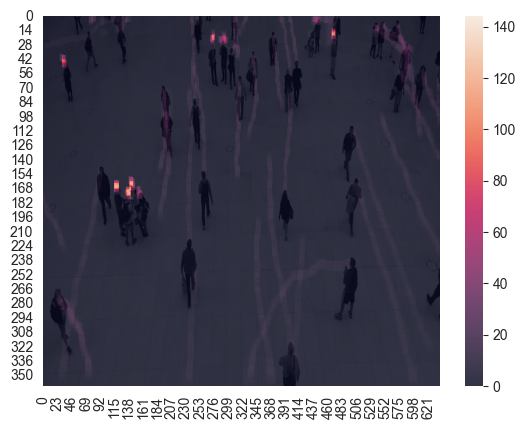

In [5]:
hmax = sns.heatmap(m_overtime, alpha = 0.8, zorder = 2)
hmax.imshow(img,
          aspect = hmax.get_aspect(),
          extent = hmax.get_xlim() + hmax.get_ylim(),
          zorder = 1)

In [ ]:
# add alpha (transparency) to a colormap
import matplotlib.cm from matplotlib.colors
import LinearSegmentedColormap
wd = matplotlib.cm.winter._segmentdata # only has r,g,b
wd['alpha'] =  ((0.0, 0.0, 0.3),
               (0.3, 0.3, 1.0),
               (1.0, 1.0, 1.0))

# modified colormap with changing alpha
al_winter = LinearSegmentedColormap('AlphaWinter', wd)

# get the map image as an array so we can plot it
import matplotlib.image as mpimg
map_img = mpimg.imread('tunis.png')

# making and plotting heatmap
import numpy.random as random
heatmap_data = random.rand(8,9)

import seaborn as sns; sns.set()

hmax = sns.heatmap(heatmap_data,
            #cmap = al_winter, # this worked but I didn't like it
            cmap = matplotlib.cm.winter,
            alpha = 0.5, # whole heatmap is translucent
            annot = True,
            zorder = 2,
            )

# heatmap uses pcolormesh instead of imshow, so we can't pass through
# extent as a kwarg, so we can't mmatch the heatmap to the map. Instead,
# match the map to the heatmap:

hmax.imshow(map_img,
          aspect = hmax.get_aspect(),
          extent = hmax.get_xlim() + hmax.get_ylim(),
          zorder = 1) #put the map under the heatmap

from matplotlib.pyplot import show
show()